In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [4]:
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
print('Labels counts in y: ', np.bincount(y))

Labels counts in y:  [50 50 50]


In [8]:
print('Labels counts in y_train: ', np.bincount(y_train))

Labels counts in y_train:  [35 35 35]


In [9]:
print('Labels count in y_test: ', np.bincount(y_test))

Labels count in y_test:  [15 15 15]


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.linear_model import Perceptron

In [13]:
# random_state = 1 me da mas errores que otro valor
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=4, tol=1e-3)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=4, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
y_pred = ppn.predict(X_test_std)
print('Misclassifiedsamples: %d' % (y_test != y_pred).sum())

Misclassifiedsamples: 2


In [15]:
y_pred

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [16]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [22]:
err = (y_test != y_pred).sum() / 45

print('Error: %.2f' % err)

Error: 0.04


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [23]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.96


In [26]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [32]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)) :
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, 
                    edgecolor='black')
        
    if test_idx :
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha= 1.0, linewidth=1, marker='o',
                   s=100, label='test set')
            

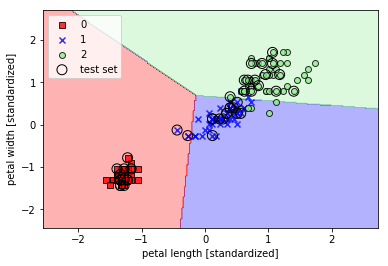

In [33]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()